# Tutorial 'QC, topographical analysis and segmentaton-free of Spot-based transcriptomics data'

This is the fast lane of the tutorial. Just start a session and click 'run the whole notebook' on the top to start executing.

UMAP calculation takes a few minutes, which we can use in the main notebook to get familiar with the general exploratory workflow.

In [58]:
# widens the screen:

%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# imports, define a handy figure function:

import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

def figure(width=8,height=8):
    plt.figure(figsize=(width,height))


In [3]:
# load background stain:


um_p_px=0.325

coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')
bg = -plt.imread('background.jpg').mean(-1)
bg = (bg-bg.min())/(bg.max()-bg.min())
bg_map = pl.PixelMap(pixel_data=bg,
                     cmap='Greys',
                     px_p_um = 0.504/um_p_px)
del bg

In [4]:
rands = np.random.rand(0,2,)*np.array([coordinates.Global_x_pos.values.max(),coordinates.Global_y_pos.values.max()])

x = np.hstack([coordinates.Global_x_pos.values,rands[:,0]])
y = np.hstack([coordinates.Global_y_pos.values,rands[:,1]])

rand_genes = coordinates.Gene.values[np.random.randint(len(coordinates.Gene.unique()), size=(rands.shape[0]))]
g = np.hstack([coordinates.Gene.values,rand_genes])

In [5]:
sdata = pl.SpatialData(x_coordinates=x*um_p_px,
                       y_coordinates=y*um_p_px,
                       genes=g,
                       pixel_maps={'DAPI':bg_map}
                      )

In [6]:
# sdata['noise']=False
# sdata.loc[len(sdata)-rands.shape[0]:,'noise']=True

sdata = sdata[sdata.stats.progressive_sample(1.05)].spatial[100:2800,1000:]

In [7]:
# Parameterization for data cleaning/artefact removal:`

#bw 100: segmentation

import time

knn_neighbors=100
bandwidth=30
n_neighbors=30
metric='euclidean'
min_dist=0.0
random_state=42
zero_weight=0.0
cutoff=11

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
t = (time.perf_counter()-t)
print(t)

Reducing dimensions with FastICA


/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Calculating UMAP embedding.
568.3785869309795


In [8]:
# Save the calculated umap:

sdata.save('tutorial-umap.pl')
# sdata = pl.load('tutorial-umap.pl')

Text(0.5, 0.98, 'nbrs:30-cutoff:11-bw:30-t:568')

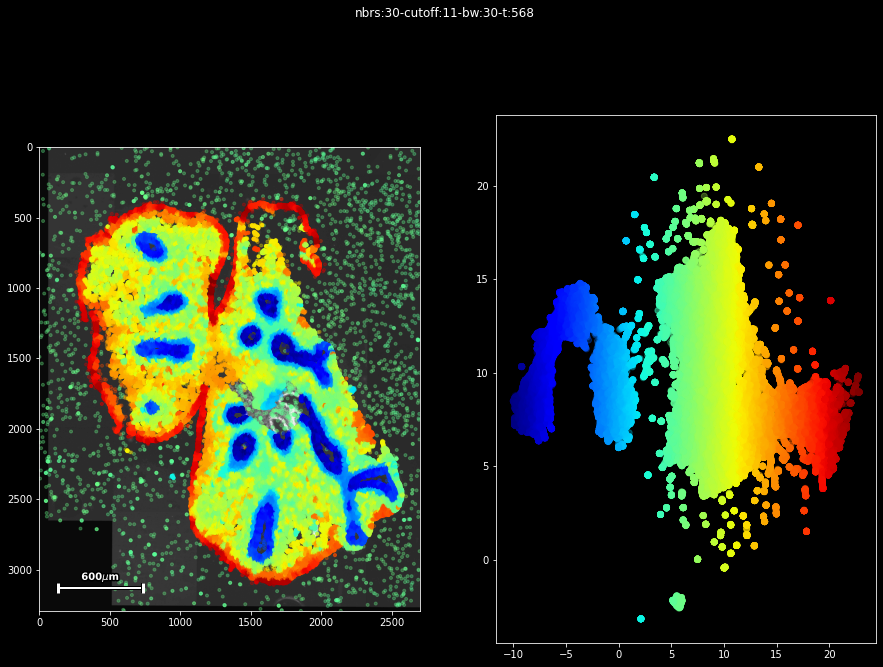

In [12]:
plt.figure(figsize=(15,15))

sdata.graph.map_and_umap(alpha=0.3,c=sdata.graph.umap_0)
plt.suptitle(f"nbrs:{n_neighbors}-cutoff:{cutoff}-bw:{bandwidth}-t:{int(t)}")

In [10]:
assert False

AssertionError: 

In [18]:
sdata

,g,x,y,gene_id,epi0,epi1,mes,bg_noise,meso,matrix
3,RSPO2,431.149120,605.792112,107,False,False,False,False,True,False
6,SPRY1,472.731437,584.026368,120,False,False,False,False,True,False
8,SPRY1,474.680608,621.385480,120,False,False,False,False,True,False
9,SPRY1,474.680608,620.410895,120,False,False,False,False,True,False
10,WNT11,475.655194,621.385480,136,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
494118,LRP2,2575.562175,2478.620662,75,False,False,False,False,False,True
494119,NOTUM,2576.536760,2450.032819,91,False,False,False,False,False,True
494120,FGFR2,2576.536760,2463.027293,44,False,False,False,False,False,True
494121,DLL4,2577.511346,2463.027293,22,False,False,False,False,False,True


In [11]:
# Use the javascript renderer to define tissue clusters:

# -bg_noise
# -epi0
# -epi1
# -mesothelial
# -matrix (skin)


sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [15]:
sdata

,g,x,y,gene_id,epi0,epi1,mes,bg_noise,meso,matrix
1,FLT1,288.209908,595.396532,47,False,False,False,True,False,False
3,RSPO2,431.149120,605.792112,107,False,False,False,False,True,False
6,SPRY1,472.731437,584.026368,120,False,False,False,False,True,False
8,SPRY1,474.680608,621.385480,120,False,False,False,False,True,False
9,SPRY1,474.680608,620.410895,120,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
494128,FGFR4,2601.551123,2478.620662,46,False,False,False,False,False,True
494130,LEF1,2620.393110,2819.400740,73,False,False,False,True,False,False
494133,FZD1,2646.382058,2433.140003,49,False,False,False,True,False,False
494135,GLI3,2648.656091,2433.140003,56,False,False,False,True,False,False


In [14]:
sdata.save('tissue_clusters.pl')

(<matplotlib.collections.PathCollection at 0x7f10dca84eb0>, None, None)

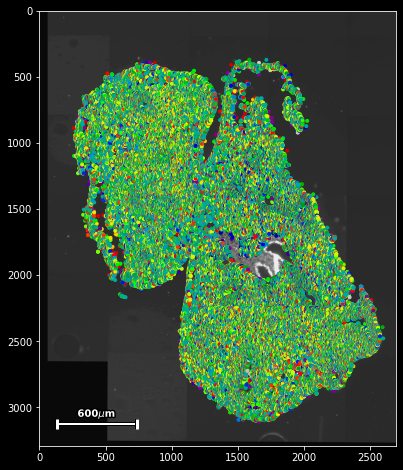

In [13]:
figure()

sdata[~sdata.bg_noise].scatter()

In [20]:
# clean from noise
sdata = sdata[~sdata.bg_noise].drop('bg_noise')

In [21]:
sdata

,g,x,y,gene_id,epi0,epi1,mes,meso,matrix
3,RSPO2,431.149120,605.792112,107,False,False,False,True,False
6,SPRY1,472.731437,584.026368,120,False,False,False,True,False
8,SPRY1,474.680608,621.385480,120,False,False,False,True,False
9,SPRY1,474.680608,620.410895,120,False,False,False,True,False
10,WNT11,475.655194,621.385480,136,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
494118,LRP2,2575.562175,2478.620662,75,False,False,False,False,True
494119,NOTUM,2576.536760,2450.032819,91,False,False,False,False,True
494120,FGFR2,2576.536760,2463.027293,44,False,False,False,False,True
494121,DLL4,2577.511346,2463.027293,22,False,False,False,False,True


In [24]:
figure(12,12)

tissues = ['epi0', 'epi1', 'mes', 'meso', 'matrix']
sdata['tissues'] = sdata.unite_columns(tissues)

# sdata = sdata[~sdata.bg_noise].drop('bg_noise')
sdata
# sdata[~sdata.bg_noise].scatter()

,g,x,y,gene_id,epi0,epi1,mes,meso,matrix,tissues
3,RSPO2,431.149120,605.792112,107,False,False,False,True,False,meso
6,SPRY1,472.731437,584.026368,120,False,False,False,True,False,meso
8,SPRY1,474.680608,621.385480,120,False,False,False,True,False,meso
9,SPRY1,474.680608,620.410895,120,False,False,False,True,False,meso
10,WNT11,475.655194,621.385480,136,False,False,False,True,False,meso
...,...,...,...,...,...,...,...,...,...,...
494118,LRP2,2575.562175,2478.620662,75,False,False,False,False,True,matrix
494119,NOTUM,2576.536760,2450.032819,91,False,False,False,False,True,matrix
494120,FGFR2,2576.536760,2463.027293,44,False,False,False,False,True,matrix
494121,DLL4,2577.511346,2463.027293,22,False,False,False,False,True,matrix


<Figure size 864x864 with 0 Axes>

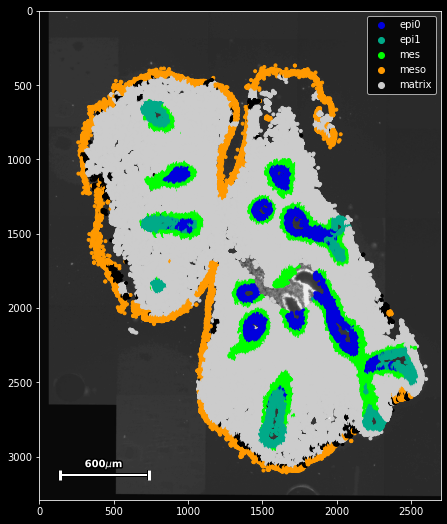

In [25]:
from matplotlib.cm import get_cmap

accent = get_cmap('nipy_spectral')

figure(9,9)
out = sdata.scatter(c=sdata.tissues.cat.codes,cmap=accent)

handlers = [plt.scatter([],[],color=accent(f)) for f in np.linspace(0.2,1,len(tissues))]

plt.legend(handlers,tissues,)


## Analyse DEGs

### ducts:

<AxesSubplot:>

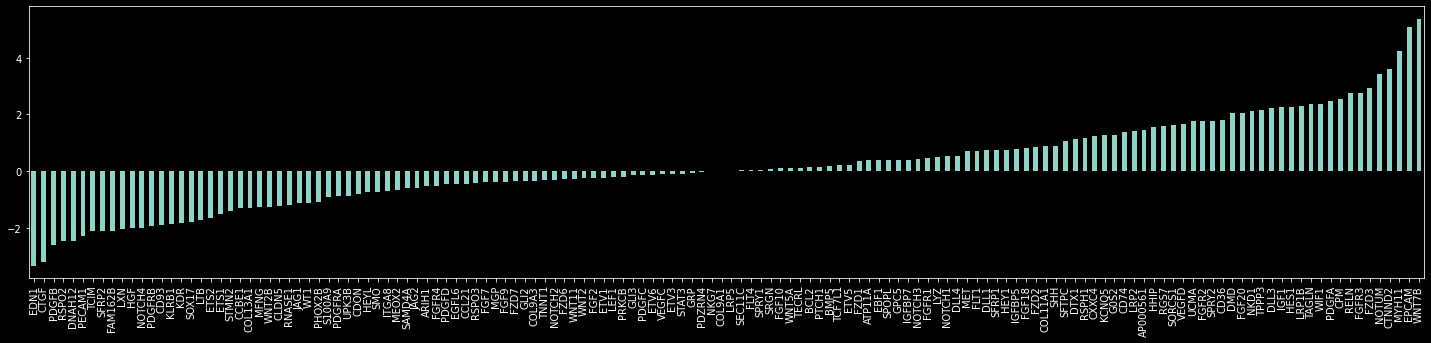

In [34]:
from plankton.stats import mor_normalize

mask_ducts = sdata.epi0|sdata.epi1|sdata.mes


c1,c2 = mor_normalize(sdata[mask_ducts],sdata[~mask_ducts])

figure(25,5)

lfc_ducts = np.log2(c1/c2).sort_values()

lfc_ducts.plot.bar()

(<matplotlib.collections.PathCollection at 0x7f10913e8bb0>,
 None,
 <matplotlib.legend.Legend at 0x7f10913c0fd0>)

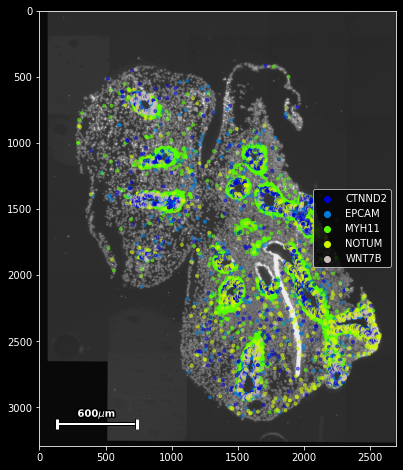

In [36]:
# degs for ducts:

figure(8,8)
sdata[sdata.g.isin(lfc_ducts[-5:].index)].scatter(alpha=0.5,legend=True)

### meso(ducts) <-> endo(ducts)

/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log2



<AxesSubplot:>

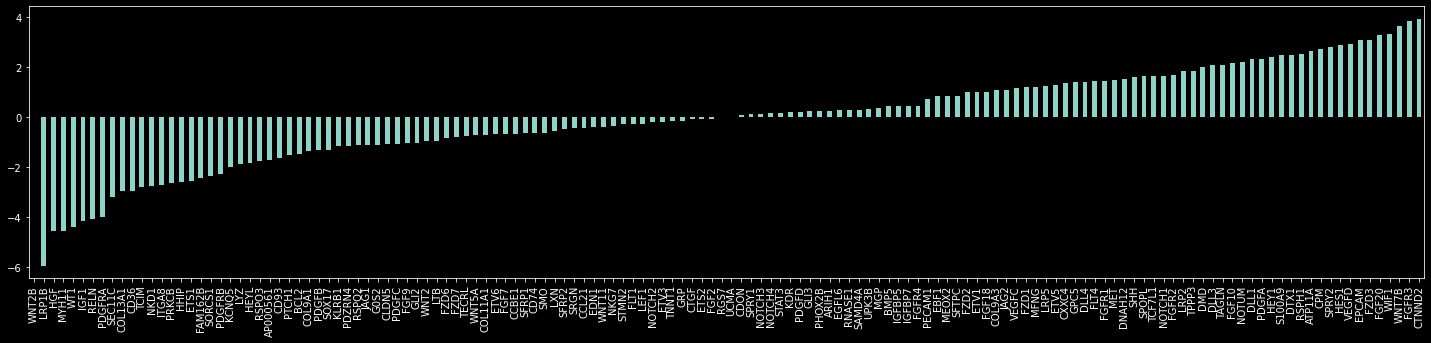

In [54]:

c1,c2 = mor_normalize(sdata[sdata.epi0|sdata.epi1],sdata[sdata.mes])

figure(25,5)

lfc_epi = np.log2(c1/c2).sort_values()

lfc_epi.plot.bar()

(<matplotlib.collections.PathCollection at 0x7f0f475059d0>, None, None)

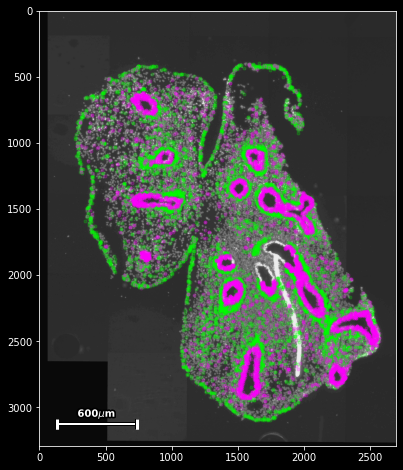

In [55]:
# degs for ducts:

figure(8,8)
sdata[sdata.g.isin(lfc_epi[:5].index)].scatter(alpha=0.2,color='lime')
sdata[sdata.g.isin(lfc_epi[-5:].index)].scatter(alpha=0.2,color='magenta')

## epi0 <-> epi1

<AxesSubplot:>

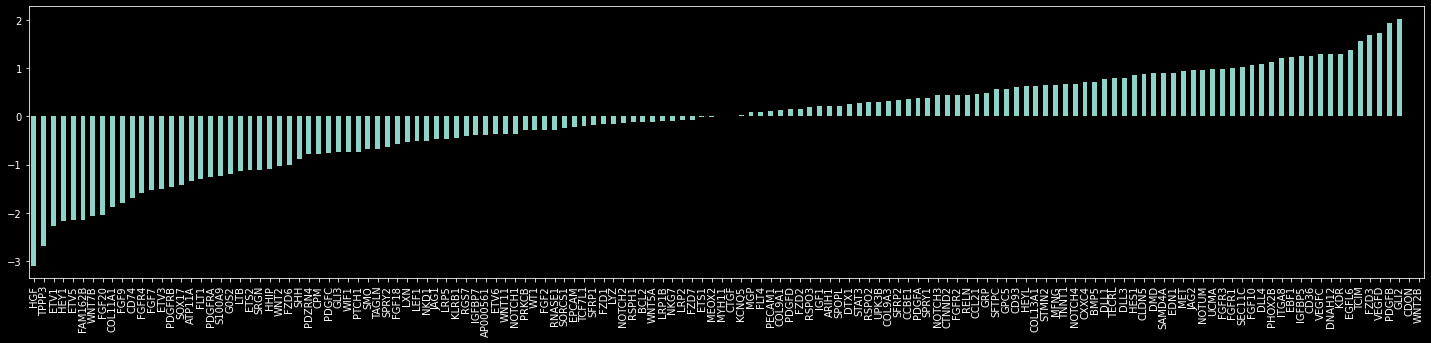

In [65]:
from plankton.stats import mor_normalize

c1,c2=mor_normalize(sdata[sdata.epi0].stats,sdata[sdata.epi1].stats)


figure(25,5)

lfc_epi_01 = np.log2(c1/c2).sort_values()

lfc_epi_01.plot.bar()

(<matplotlib.collections.PathCollection at 0x7f0fc105b790>,
 None,
 <matplotlib.legend.Legend at 0x7f0fc102cd30>)

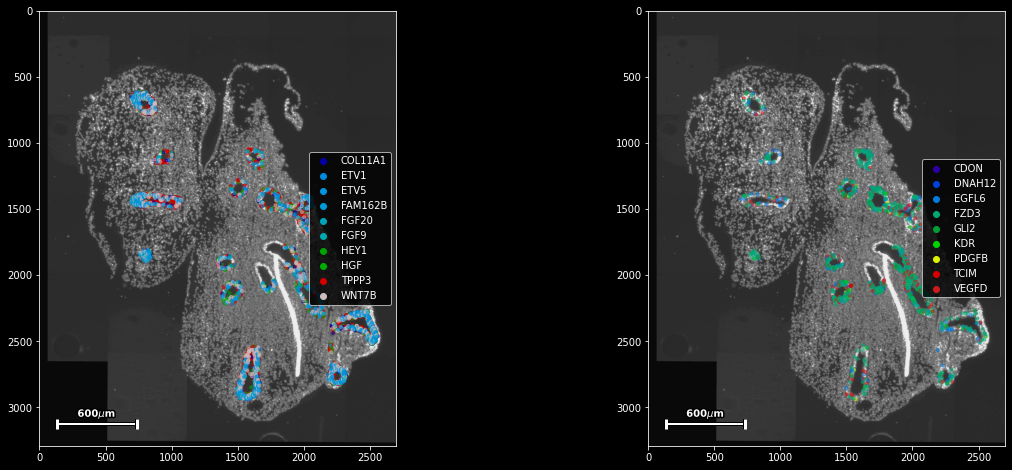

In [86]:
# degs for ducts:

figure(20,8)
plt.subplot(121)
sdata[sdata.g.isin(lfc_epi_01[:10].index)&(sdata.epi0|sdata.epi1)].scatter(alpha=0.5,legend=True)

plt.subplot(122)
sdata[sdata.g.isin(lfc_epi_01[-10:].index)&(sdata.epi0|sdata.epi1)].scatter(alpha=0.5,legend=True)

# sdata[sdata.g.isin(lfc_epi_01[-5:].index)].scatter(alpha=0.5,color='magenta')

(<matplotlib.collections.PathCollection at 0x7f0fc133ccd0>, None, None)

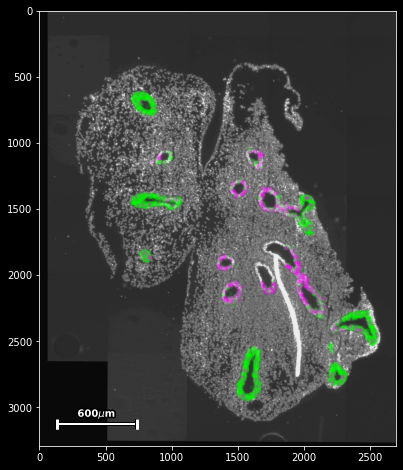

In [84]:
# degs for ducts:

figure(8,8)

sdata[sdata.g.isin(lfc_epi_01[:5].index)&(sdata.epi0|sdata.epi1)].scatter(alpha=0.1,color='lime')

sdata[sdata.g.isin(lfc_epi_01[-10:].index)&(sdata.epi0|sdata.epi1)].scatter(alpha=0.1,color='magenta')




# unsupervised approach using SSAM-denovo

In [120]:
from plankton.utils import localmax_sampling,ssam

# create a signature matrix through local-max sampling
signatures = pd.DataFrame(localmax_sampling(sdata,n_clusters=12,bandwidth=6),columns=sdata.genes)

ct_map = ssam(sdata,signatures=signatures,kernel_bandwidth=6,threshold_exp=0.95)

/home/sebastian/src/planktonpy/plankton/utils.py:362: RuntimeWarning:

invalid value encountered in true_divide

/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning:

From version 1.3 whiten='unit-variance' will be used by default.



[260, 1260, 2260, 2602] [368, 1368, 2368, 3108]


  0%|          | 0/9 [00:00<?, ?it/s]

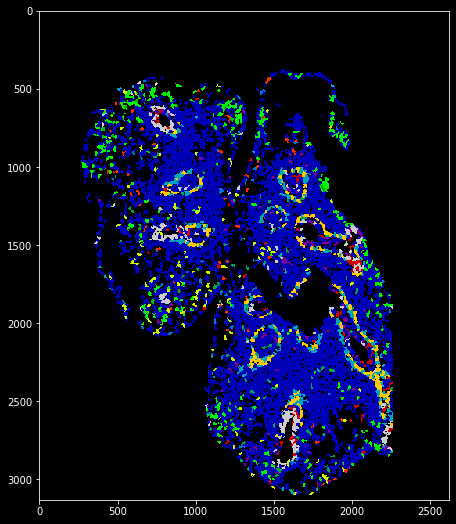

In [121]:
figure(9,9)
ct_map.imshow(cmap='nipy_spectral',interpolation='none')

In [ ]:
sdata_epi.graph.map_and_umap()

In [ ]:
sdata_epi.graph.umap_js()